In [14]:
# Importing all the dependencies required for this Notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# initial variable analysis tools
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.decomposition import PCA
from patsy import dmatrices
import itertools

In [4]:
train_data = pd.read_csv("df_train_new.csv")
df_train = pd.DataFrame(train_data)

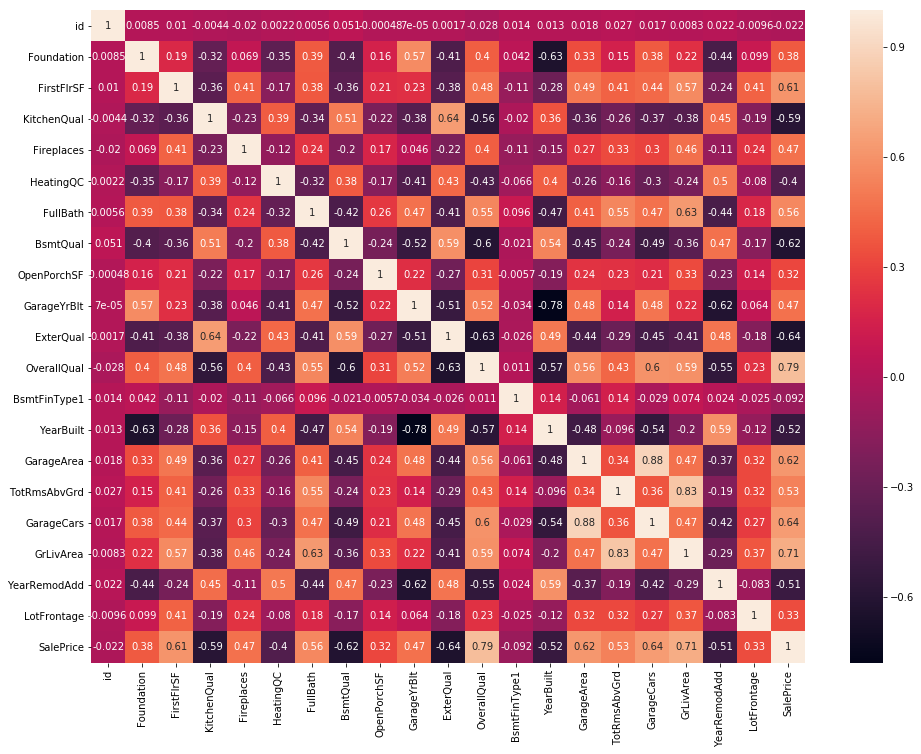

In [7]:
# Build the correlation matrix
matrix = df_train.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(matrix,  annot=True, cbar=True)

In [8]:
interesting_variables = matrix['SalePrice'].sort_values(ascending=False)
# Filter out the target variables (SalePrice) and variables with a low correlation score (v such that -0.6 <= v <= 0.6)
interesting_variables = interesting_variables[abs(interesting_variables) >= 0.6]
interesting_variables = interesting_variables[interesting_variables.index != 'SalePrice']
interesting_variables

OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
FirstFlrSF     0.605852
BsmtQual      -0.618025
ExterQual     -0.636884
Name: SalePrice, dtype: float64

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

pred_vars = [v for v in interesting_variables.index.values if v != 'SalePrice']
target_var = 'SalePrice'

X = df_train[pred_vars]
y = df_train[target_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

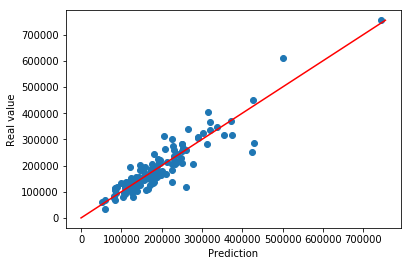

In [11]:
y_pred = model.predict(X_test)

# Build a plot
plt.scatter(y_pred, y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')

# Now add the perfect prediction line
diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()

In [16]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

print('MAE:\t$%.2f' % mean_absolute_error(y_test, y_pred))
print('MSLE:\t%.5f' % mean_squared_log_error(y_test, y_pred))
# evaluate accuracy
#print("accuracy: {}".format(accuracy_score((y_test, y_pred)))

MAE:	$24770.92
MSLE:	0.03683


In [18]:
import numpy as np

def mean_absolute_percentage_error(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

mean_absolute_percentage_error(y_test, y_pred)

14.606912817038253